In [6]:
from plot_utils import read_event_history
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")

In [7]:
event_history, num_customers = read_event_history("event_history.csv")
event_history.sort_values(by="actual_group", inplace=True)
custom_log = pd.read_csv("custom_log.csv")

### Loss Aversion

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey=True)


for row_idx, row in enumerate(['customer_wtp', 'rp']):
    for col_idx, col in enumerate([0, 1]):
        # Show legend only for the first subplot (0,0)
        show_legend = (row_idx == 0 and col_idx == 0)
        
        sns.scatterplot(
            x="t", 
            y=row, 
            data=event_history.loc[
                (event_history.event == 'visit') &
                (event_history.run_id == col)],
            hue="actual_group", 
            ax=axs[row_idx, col_idx],
            legend=show_legend)
        
        # Add better titles for each subplot
        # axs[row_idx, col_idx].set_title(f"Run {row}: {col}")

# Improve layout
plt.tight_layout()

### Market Transparency

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey=True)


for row_idx, row in enumerate(['erp', 'rp']):
    for col_idx, col in enumerate([0, 1]):
        # Show legend only for the first subplot (0,0)
        show_legend = (row_idx == 0 and col_idx == 0)
        
        sns.scatterplot(
            x="t", 
            y=row, 
            data=event_history.loc[
                (event_history.event == 'visit') &
                (event_history.run_id == col_idx)],
            hue="actual_group", 
            ax=axs[row_idx, col_idx],
            legend=show_legend)
        
        # Add better titles for each subplot
        # axs[row_idx, col_idx].set_title(f"Run {row}: {col}")

# Improve layout
plt.tight_layout()

#### Effect of market transparency on revenue

/home/laurin/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


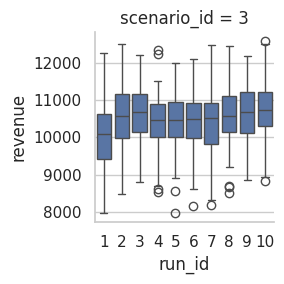

In [8]:
g = sns.FacetGrid(custom_log, col="scenario_id")
g.map(sns.boxplot, "run_id", "revenue")

In [86]:
sold_events = event_history.loc[event_history.event=='sold']

In [87]:
(sold_events['customer_wtp'] - sold_events['price']).mean()

np.float64(19.20428134556575)